In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
df=pd.read_csv("/content/petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


4 features and target variable is a continous variable and it is a regression pblm


In [ ]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [ ]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [ ]:
df=df.drop_duplicates()

In [ ]:
df['Petrol_tax'].unique()

array([ 9.  ,  7.5 ,  8.  , 10.  ,  7.  ,  8.5 ,  6.58,  5.  ,  6.  ])

In [ ]:
df.shape

(48, 5)

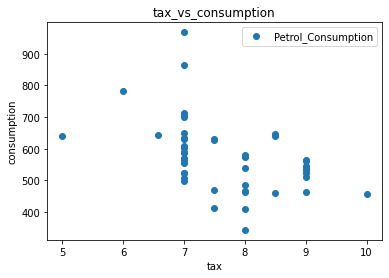

In [ ]:
df.plot(x='Petrol_tax',y='Petrol_Consumption',style='o')
plt.title("tax_vs_consumption")
plt.xlabel("tax")
plt.ylabel("consumption")
plt.show()

CANT ABLE TO INTERPRET THE DATA WITH THIS PLOT, THERE ARE MULTIPLE COUNTRY HAVE SAME PETROL TAX


In [ ]:
df.groupby('Petrol_tax')['Petrol_Consumption'].mean()

Petrol_tax
5.00     640.000000
6.00     782.000000
6.58     644.000000
7.00     631.736842
7.50     536.000000
8.00     502.000000
8.50     582.666667
9.00     530.875000
10.00    457.000000
Name: Petrol_Consumption, dtype: float64

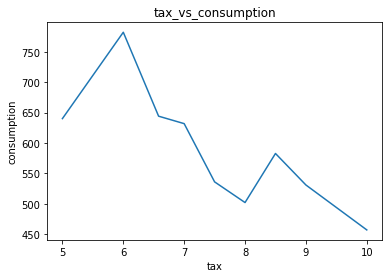

In [ ]:
df.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
plt.title("tax_vs_consumption")
plt.xlabel("tax")
plt.ylabel("consumption")
plt.show()

negative relationship between petrol tax and petrol consumption


In [ ]:
df[['Petrol_tax','Petrol_Consumption']].corr()


,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


correlation - value greater than 0.2 and less than 0.2 indicates the linearity

so no transformation required


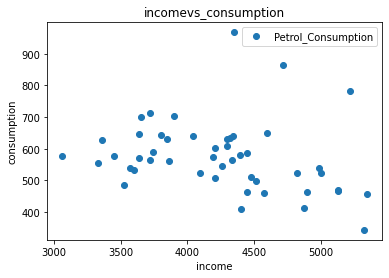

In [ ]:
df.plot(x='Average_income',y='Petrol_Consumption',style='o')
plt.title("incomevs_consumption")
plt.xlabel("income")
plt.ylabel("consumption")
plt.show()

avg income increases the petrol consumption decreases here


In [ ]:
df[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


it indicates linearity but it just pass , it is in the border.

inline with gk richer richer the consumption grows


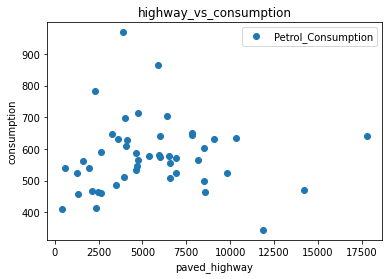

In [ ]:
df.plot(x='Paved_Highways',y='Petrol_Consumption',style='o')
plt.title("highway_vs_consumption")
plt.xlabel("paved_highway")
plt.ylabel("consumption")
plt.show()

no linearity so we need to transform

In [ ]:
df[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.019042
Petrol_Consumption,0.019042,1.000000


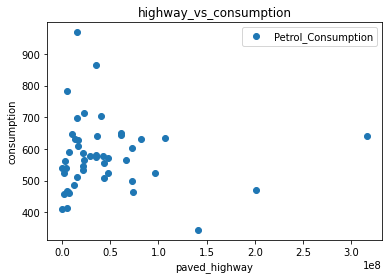

In [ ]:
df['transform']=np.square(df['Paved_Highways'])
df.plot(x='transform',y='Petrol_Consumption',style='o')
plt.title("highway_vs_consumption")
plt.xlabel("paved_highway")
plt.ylabel("consumption")
plt.show()

In [ ]:
df[['transform','Petrol_Consumption']].corr()

,transform,Petrol_Consumption
transform,1.000000,-0.046976
Petrol_Consumption,-0.046976,1.000000


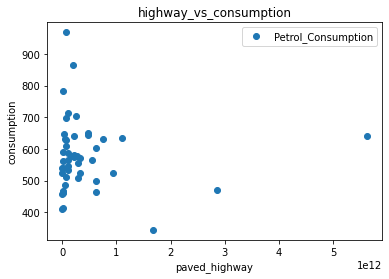

In [ ]:
df['transform']=np.power(df['Paved_Highways'],3)
df.plot(x='transform',y='Petrol_Consumption',style='o')
plt.title("highway_vs_consumption")
plt.xlabel("paved_highway")
plt.ylabel("consumption")
plt.show()

In [ ]:
df[['transform','Petrol_Consumption']].corr()

,transform,Petrol_Consumption
transform,1.000000,-0.046703
Petrol_Consumption,-0.046703,1.000000


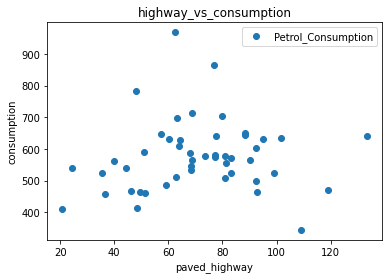

In [ ]:
df['transform']=np.power(df['Paved_Highways'],0.5)
df.plot(x='transform',y='Petrol_Consumption',style='o')
plt.title("highway_vs_consumption")
plt.xlabel("paved_highway")
plt.ylabel("consumption")
plt.show()

In [ ]:
df[['transform','Petrol_Consumption']].corr()

,transform,Petrol_Consumption
transform,1.000000,0.086698
Petrol_Consumption,0.086698,1.000000


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


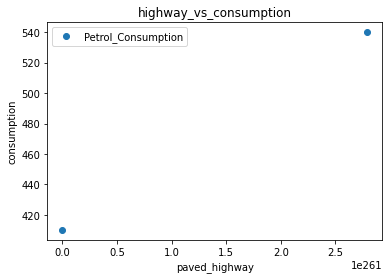

In [ ]:
df['transform']=np.exp(df['Paved_Highways'])
df.plot(x='transform',y='Petrol_Consumption',style='o')
plt.title("highway_vs_consumption")
plt.xlabel("paved_highway")
plt.ylabel("consumption")
plt.show()

In [ ]:
df[['transform','Petrol_Consumption']].corr()

,transform,Petrol_Consumption
transform,NaN,0.0
Petrol_Consumption,0.0,1.0


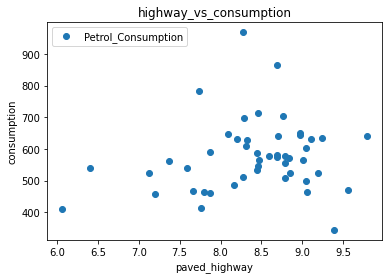

In [ ]:
df['transform']=np.log(df['Paved_Highways'])
df.plot(x='transform',y='Petrol_Consumption',style='o')
plt.title("highway_vs_consumption")
plt.xlabel("paved_highway")
plt.ylabel("consumption")
plt.show()

In [ ]:
df[['transform','Petrol_Consumption']].corr()

,transform,Petrol_Consumption
transform,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


if none of the transformation works, so we can delete the feature
we cant do linear regression with this feature


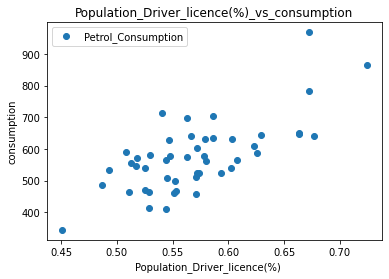

In [ ]:
df.plot(x='Population_Driver_licence(%)',y='Petrol_Consumption',style='o')
plt.title("Population_Driver_licence(%)_vs_consumption")
plt.xlabel("Population_Driver_licence(%)    ")
plt.ylabel("consumption")
plt.show()

In [ ]:
df[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


linearity and no need for transformation

In [ ]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption', 'transform'],
      dtype='object')

In [ ]:
x=df[['Petrol_tax','Average_income','Population_Driver_licence(%)']].values
y=df['Petrol_Consumption'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x,y)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_) #c

[-27.5740315  -40.20972113  78.52286893]


In [ ]:
print(regressor.intercept_)    #m slope

579.2725215841361


In [ ]:
df=pd.DataFrame(regressor.coef_,['Petrol_tax','Average_salary',"Population_driver_license"],columns=['coefficient'])
df

,coefficient
Petrol_tax,-27.574032
Average_salary,-40.209721
Population_driver_license,78.522869


In [ ]:
y_pred=regressor.predict(x_test)
y_pred

array([475.00906261, 520.7466447 , 593.83728883, 566.62785311,
       664.02745507, 645.70051822, 500.9056605 , 663.819704  ,
       482.12139852, 501.28545047])

In [ ]:
#petrol consumption = -27*scaled petrol tax + -40*scaled avg salary + 78*popoulation driver license + 579

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,534,475.009063
1,410,520.746645
2,577,593.837289
3,571,566.627853
4,577,664.027455
5,704,645.700518
6,487,500.905660
7,587,663.819704
8,467,482.121399
9,580,501.285450


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.32520447692222665


The r2 score is above 0, it indicates the model is an average model.

The range of r2 score is from -infinity to 1. 

Any model less than  0 is a useless model 

we obtained 0.3 which an average value.